# Bachelorarbeit - Evaluierung und Vergleich der Front-End Technologien Angular und React
## Andreas Kappel, BSWE, 2010859008

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading the input file and drop empty entries

In [3]:
log_data = pd.read_csv('log_dom.csv')

### Settings for automated diagram generation

In [4]:
size = None
sizes = [1, 10, 100, 1000]
transparent = True
filename = "./charts/plot_size_{}.png"

browsers = ['Chrome', 'Firefox']
frameworks = ['Angular', 'React']
events = ['domManipulation_ADD', 'domManipulation_EDIT', 'domManipulation_DELETE']

In [5]:
def create_browser_frame(df):
    apps = dict()

    for evt in events:
        a_list = dict()
        for a in browsers:
            a_list[a] = df.query(f"browser == '{a}'").query(f"event == '{evt}'").mean(numeric_only=True)['time']

        apps[evt.replace('domManipulation_', '')] = a_list

    return pd.DataFrame.from_dict(apps)

In [6]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot", s=1, H="/", **kwargs):
    n_df = len(dfall)
    n_col = len(dfall[0].columns)
    n_ind = len(dfall[0].index)
    plt.cla()
    axe = plt.subplot(111)

    for df in dfall:  # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      zorder=10,
                      **kwargs)  # make bar plots

    plt.grid(axis='y', linestyle='dashed', zorder=-50)
    h, l = axe.get_legend_handles_labels()  # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col):  # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i + n_col]):
            for rect in pa.patches:  # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col))  #edited part
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation=0)
    axe.set_xlabel("Browsers")
    axe.set_ylabel("time in ms")
    axe.set_title(title)

    # Add invisible data to add another legend
    n = []
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1])
    else:
        l2 = plt.legend(n, [], loc=[1.01, 0.1])

    axe.add_artist(l1)
    plt.savefig(filename.format(s), bbox_inches="tight", transparent=transparent)
    return axe

### Plot grouped dataframes as stacked bar chart

In [7]:
if size != None:
    all_val = []
    for f in frameworks:
        all_val.append(create_browser_frame(log_data.query(f"size == {size}").query(f"app == '{f}'")))

    plot_clustered_stacked(
        all_val,
        labels=frameworks,
        title=f"DOM Manipulation for {size} {'elements' if size != 1 else 'element'}",
        s=size
    )

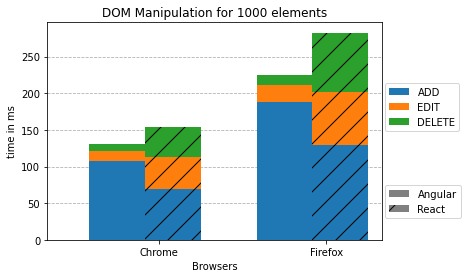

In [8]:
for s in sizes:
    all_val = []
    for f in frameworks:
        all_val.append(create_browser_frame(log_data.query(f"size == {s}").query(f"app == '{f}'")))

    plot_clustered_stacked(
        all_val,
        labels=frameworks,
        title=f"DOM Manipulation for {s} {'elements' if s != 1 else 'element'}",
        s=s
    )